In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_img(image, title="image"):
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
tungsten = "/Users/yuna/Homework/HW3 Image Samples/Edge Detection/Fig0327(a)(tungsten_original).jpg"
Lenna = "/Users/yuna/Homework/HW3 Image Samples/Edge Detection/lenna_color.bmp"

In [4]:
src = cv2.imread(tungsten, 0)

h, w = src.shape

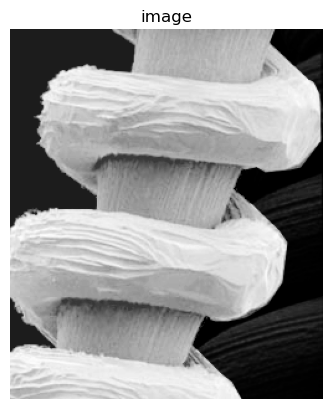

In [5]:
show_img(src)

In [6]:
sobel_maskX = [ [-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1] ]
sobel_maskY = [ [1, 2, 1],
                [0, 0, 0],
              [-1, -2, -1] ]

prewitt_maskX = [ [-1, 0, 1],
                  [-1, 0, 1],
                  [-1, 0, 1] ]
prewitt_maskY = [ [1, 1, 1],
                  [0, 0, 0],
                [-1, -1, -1] ]

In [7]:
def edge_sharpening(image, h, w, maskX, maskY):
    new = np.zeros((h,w), dtype=np.uint8)
    
    for i in range(3, h-3):
        for j in range(3, w-3):
            Gx = 0
            Gy = 0
            sum_ = 0
            for x in range(3):
                for y in range(3):
                    Gx += image[i+x-1][j+y-1] * maskX[x][y]
                    Gy += image[i+x-1][j+y-1] * maskY[x][y]
            sum_ = (Gx**2 + Gy**2)**0.5
            if (sum_<0): sum_=0
            if (sum_>255): sum_ = 255
            new[i][j] = sum_
            
    return new

def edge_detection(image, threshold):
    new = np.zeros((h,w), dtype=np.uint8)
    
    for i in range(h):
        for j in range(w):
            if (image[i][j] >= threshold):
                new[i][j] = 255
            else: new[i][j] = 0
                
    return new

In [27]:
new = edge_sharpening(src, h, w, prewitt_maskX, prewitt_maskY)
new = edge_detection(new, 200)

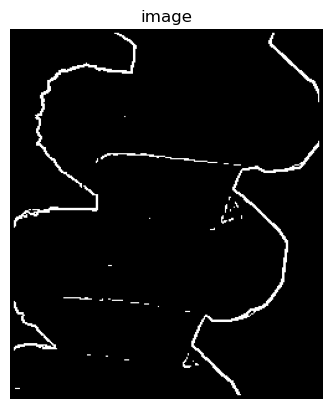

In [28]:
show_img(new)

In [29]:
cv2.imwrite("/Users/yuna/Homework/HW3 Image Samples/Edge Detection/Fig0327(a) prewitt t=200.jpg", new)

True